In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/gdriv')

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


In [13]:
data_path = '/content/gdriv/My Drive/Colab Notebooks'
BCI = pd.read_csv(data_path+'/data/BCI.csv')
BCI = BCI.iloc[3000:,:]
BCI.head()

,date,BCI
3000,2011-Feb-25,1315
3001,2011-Feb-28,1310
3002,2011-Mar-01,1314
3003,2011-Mar-02,1337
3004,2011-Mar-03,1390


In [14]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [15]:
sc = MinMaxScaler()
dt = sc.fit_transform(dt)
seq_length = 4
x, y = sliding_windows(dt, seq_length)
print(x,y)
print(x.shape)
print(y.shape)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

[[[0.07175855]
  [0.07021866]
  [0.07145057]
  [0.07853403]]

 [[0.07021866]
  [0.07145057]
  [0.07853403]
  [0.09485679]]

 [[0.07145057]
  [0.07853403]
  [0.09485679]
  [0.10625192]]

 ...

 [[0.1644595 ]
  [0.18232214]
  [0.18786572]
  [0.18909763]]

 [[0.18232214]
  [0.18786572]
  [0.18909763]
  [0.18047428]]

 [[0.18786572]
  [0.18909763]
  [0.18047428]
  [0.16353557]]] [[0.09485679]
 [0.10625192]
 [0.13089005]
 [0.15799199]
 [0.19002156]
 [0.23837388]
 [0.24915306]
 [0.24114567]
 [0.22451494]
 [0.20388051]
 [0.19094549]
 [0.18632584]
 [0.18386203]
 [0.19063751]
 [0.20696027]
 [0.22051124]
 [0.22266708]
 [0.22328303]
 [0.21650755]
 [0.20757622]
 [0.21127194]
 [0.21866338]
 [0.21465969]
 [0.19895288]
 [0.18232214]
 [0.17123499]
 [0.16322759]
 [0.15645211]
 [0.15214044]
 [0.15029258]
 [0.15121651]
 [0.14844472]
 [0.144749  ]
 [0.14043733]
 [0.14105328]
 [0.14105328]
 [0.14290114]
 [0.14906067]
 [0.14844472]
 [0.15090853]
 [0.14721281]
 [0.14166923]
 [0.14906067]
 [0.14628888]
 [0.13

In [16]:
class LSTM(nn.Module):

    def __init__(self, output, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.output = output
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, output)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [17]:
dt = bdi.iloc[:,1:2].values
print(dt.shape)

(793, 1)


In [18]:
sc = MinMaxScaler()
dt = sc.fit_transform(dt)

seq_length = 90
x, y = sliding_windows(dt, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [19]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
output = 1

lstm = LSTM(output, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.08909
Epoch: 100, loss: 0.00209
Epoch: 200, loss: 0.00104
Epoch: 300, loss: 0.00077
Epoch: 400, loss: 0.00063
Epoch: 500, loss: 0.00052
Epoch: 600, loss: 0.00043
Epoch: 700, loss: 0.00036
Epoch: 800, loss: 0.00031
Epoch: 900, loss: 0.00027
Epoch: 1000, loss: 0.00024
Epoch: 1100, loss: 0.00022
Epoch: 1200, loss: 0.00021
Epoch: 1300, loss: 0.00021
Epoch: 1400, loss: 0.00020
Epoch: 1500, loss: 0.00020
Epoch: 1600, loss: 0.00020
Epoch: 1700, loss: 0.00020
Epoch: 1800, loss: 0.00020
Epoch: 1900, loss: 0.00020


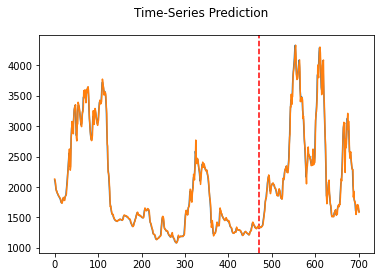

In [20]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()